In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import download_file
import scipy as sp
from numpy import sqrt, sin, cos, pi
import scipy.integrate as integrate
import math
import scipy.stats

In [2]:
#Load FITS File from Catalog
fits_file = ('/Users/ascoh/Desktop/UChicago/Academics/2020-21/DR5_cluster-catalog_v1.0b3.fits')

In [3]:
#Load Headers and Data from FITS
image = fits.open(fits_file)
image_data = fits.getdata(fits_file)

In [4]:
image[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2515 / length of dimension 1                          
NAXIS2  =                 4195 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   51 / number of table fields                         
TTYPE1  = 'name    '                                                            
TFORM1  = '19A     '                                                            
TTYPE2  = 'RADeg   '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'decDeg  '        

In [5]:
data = image[1].data

In [6]:
#Calculate Comoving Distance
RShift = data['redshift']
Dc=[]
M=0.3
K=0.0
L=0.7
Z=1.0
Dh=3E5/70.
def E(z):
    return 1/sqrt(M*((1+z)**3)+K*((1+z)**2)+L)

for i in range(len(RShift)):
    z=RShift[i]
    result,err=(integrate.quad(E,0,z))
    Dc.append(result*Dh)
np.hstack(Dc)

array([1197.42466569, 2998.65691113, 1130.83509589, ..., 3816.95302083,
       2720.6309064 , 2466.57638418])

In [7]:
RA = data['RAdeg']
Deg=[]
for j in range(len(RA)):
    Deg.append((np.pi/180)*RA[j]) #Convert RA angles to Radians
    
np.hstack(Deg)

array([3.64710448e-04, 1.07020913e-03, 1.56913341e-03, ...,
       6.28126089e+00, 6.28196133e+00, 6.28298075e+00])

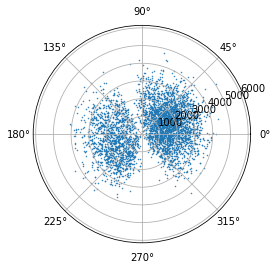

In [8]:
#Plot RA vs RedShift
plt.axes(projection = 'polar') 
plt.scatter(Deg,Dc,s=1,marker='.')

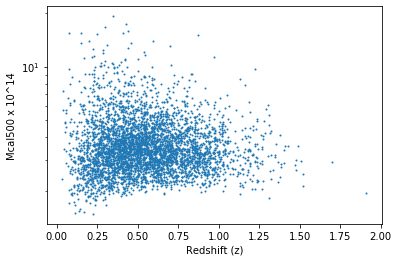

In [14]:
#Plot Mass vs RedShift
Mass=data['M500Cal']
plt.figure()
F18 = plt.scatter(RShift,Mass,s=1,)
plt.xlabel('Redshift (z)')
plt.ylabel('Mcal500 x 10^14')
plt.yscale('log')
plt.show()

In [10]:
#Calculate the Planck Spectrum Distortion Caused by SZ Effect
def g(v):
    h = 6.626E-34
    Kb = 1.381E-23
    X = (6.626E-34*v)/(1.381E-23*2.7)
    a = (X*np.exp(X))/(np.exp(X)-1)
    g = a*(X/np.tanh(X/2.)-4)*((2*6.26E-34*v**3)/(3E8**2))*(1/(np.exp(X)-1))
    return g

n_array = np.linspace(1E9,800E9,1000)
g_array = np.empty(len(n_array))

for i in range(len(g_array)):
             g_array[i] = g(n_array[i])

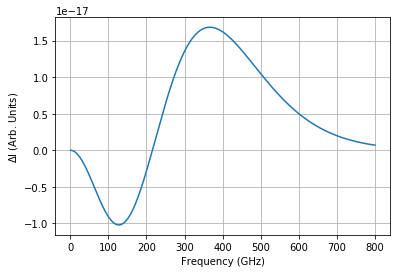

In [11]:
#Plot SZ Effect
plt.figure()
plt.plot(n_array/1.E9,g_array)
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$\Delta$I (Arb. Units)')
plt.grid(True)
plt.show()

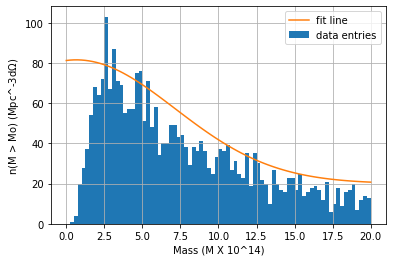

In [120]:
from scipy.stats import norm
import matplotlib.mlab as mlab

Halo_Mass=[]
h_bins=np.arange(0,20.25,0.25)
#Calculate Comoving Volume and Halo Mass Function (Mass/Comoving Volume)
for i in range(len(Dc)):
    Vc=(Dc[i]**3)*(4*np.pi)/3
    Halo_Mass.append(Mass[i]*1E11/Vc)
Halo_Mass_array = np.hstack(Halo_Mass)

plt.figure()
HaloData,bins,patches = plt.hist(Halo_Mass,bins=h_bins,label=r'data entries')

(mu, sigma) = sp.stats.norm.fit(Halo_Mass_array/150)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, 20+best_fit_line*1000,label=r'fit line')


plt.grid(True)
plt.xlabel('Mass (M X 10^14)')
plt.ylabel('n(M > Mo) (Mpc^-3d$\Omega$)')
plt.legend(loc='best')
plt.show()

list

array([33.44955798,  3.08271733, 63.6900604 , ...,  0.88511936,
        5.00878698,  4.8564131 ])